In [1]:
import acquire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using your store items data you acquired in lesson 1 exercises:

- Convert date column to datetime format.
- Plot the distribution of sale_amount, item_price and sale_date.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


Using the OPS data acquired in lesson 1 exercises:

- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [23]:
df = acquire.combine_dfs()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
item             913000 non-null int64
sale_amount      913000 non-null float64
sale_date        913000 non-null object
sale_id          913000 non-null int64
store            913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_id         913000 non-null int64
store_state      913000 non-null object
store_zipcode    913000 non-null object
item_brand       913000 non-null object
item_id          913000 non-null int64
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null object
item_upc14       913000 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 118.4+ MB


In [25]:
df.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [26]:
fmt = "%a, %d %b %Y %H:%M:%S %Z"
pd.to_datetime("now").strftime(fmt)

'Fri, 15 Nov 2019 18:02:54 '

In [27]:
df.sale_date = pd.to_datetime(df.sale_date, format=fmt)

In [28]:
# df = df.set_index("sale_date")
df = df.sort_values(by="sale_date").set_index("sale_date")

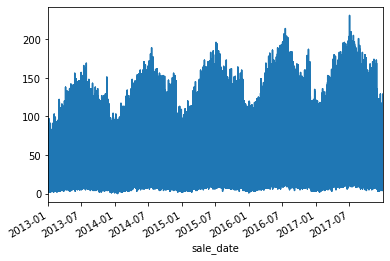

In [33]:
df.sale_amount.plot()
plt.show()

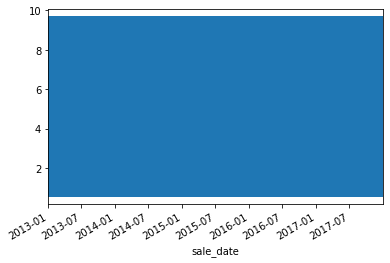

In [30]:
df.item_price.plot()
plt.show()

In [31]:
df["month"] = df.index.strftime("%m-%b")
df["weekday"] = df.index.strftime("%w-%a")

In [42]:
(df.sale_amount.astype("int") == df.sale_amount).all()

True

In [45]:
df.sale_amount = df.sale_amount.astype("int")

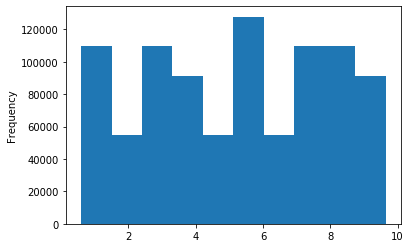

In [46]:
df.item_price.plot.hist()
plt.show()

In [47]:
df['sales_total'] = df.sale_amount * df.item_price

In [51]:
sales_by_day = df.resample("D")[["sales_total"]].sum()
sales_by_day

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85
2013-01-06 00:00:00+00:00,93093.85
2013-01-07 00:00:00+00:00,63777.54
2013-01-08 00:00:00+00:00,72994.66
2013-01-09 00:00:00+00:00,75133.92


In [54]:
sales_by_day["diff_with_last_day"]=sales_by_day.sales_total.diff()

sales_by_day

,sales_total,diff_with_last_day
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43
2013-01-03 00:00:00+00:00,78169.48,4598.90
2013-01-04 00:00:00+00:00,84467.73,6298.25
2013-01-05 00:00:00+00:00,87621.85,3154.12
2013-01-06 00:00:00+00:00,93093.85,5472.00
2013-01-07 00:00:00+00:00,63777.54,-29316.31
2013-01-08 00:00:00+00:00,72994.66,9217.12
2013-01-09 00:00:00+00:00,75133.92,2139.26


In [ ]:
def prep_store_data(df):
    fmt = "%a, %d %b %Y %H:%M:%S %Z"
    df.sale_date = pd.to_datetime(df.sale_date, format=fmt)
    df = df.sort_values(by="sale_date").set_index("sale_date")
    
    df["month"] = df.index.strftime("%m-%b")
    df["weekday"] = df.index.strftime("%w-%a")
    
    df['sales_total'] = df.sale_amount * df.item_price
    return df

In [ ]:
def get_sales_by_day(df):    
    sales_by_day = df.resample("D")[["sales_total"]].sum()
    sales_by_day["diff_with_last_day"]=sales_by_day.sales_total.diff()
    return sales_by_day